In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [95]:
november = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\nov_final.csv")
october = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\october.csv")
december = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\December.csv")

In [3]:
november

,Unnamed: 0,timestamp,PM2.5,PM10,NO2,CO,Ozone,Temp,RH,pm25_air,pm10_air,co_air,no2_air
0,1,01-11-2020 01:00,74.75,168.50,39.92,0.53,61.38,29.40,62.50,79.5,123.0,2.0,50.405
1,2,01-11-2020 02:00,76.75,151.50,37.65,0.48,57.85,29.42,65.00,79.5,119.0,2.0,49.660
2,3,01-11-2020 03:00,67.50,132.25,36.92,0.46,52.95,29.47,67.50,82.0,120.0,2.0,49.335
3,4,01-11-2020 04:00,69.50,137.75,36.98,0.45,52.25,29.80,68.00,81.5,123.5,2.0,46.320
4,5,01-11-2020 05:00,72.00,147.25,35.65,0.56,42.98,29.38,72.25,87.0,124.5,2.0,44.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,792,30-11-2020 19:00,31.00,80.25,31.12,0.53,38.52,29.20,74.00,51.5,89.5,2.0,49.525
792,793,30-11-2020 20:00,49.00,104.00,76.92,1.25,4.45,29.20,73.75,62.5,117.0,2.0,51.705
793,794,30-11-2020 21:00,83.50,172.75,92.80,1.90,1.25,29.25,71.25,83.5,142.5,2.0,52.935
794,795,30-11-2020 22:00,80.25,176.00,91.62,2.00,2.40,29.30,73.50,94.5,156.0,2.5,52.200


In [6]:
october

,Unnamed: 0,created_at,pm25_air,pm10_air,co_air,no2_air,PM2.5,PM10,NO2,CO,Ozone,Temp,RH,WS
0,1,01-10-2020 01:00,52.5,86.0,2.0,49.480,35.50,51.75,20.55,0.21,NaN,29.00,85.50,0.30
1,2,01-10-2020 02:00,60.5,94.5,2.0,47.290,33.00,50.25,20.50,0.21,NaN,29.12,86.25,0.32
2,3,01-10-2020 03:00,81.0,122.0,2.0,46.045,30.00,48.00,23.05,0.21,NaN,29.10,87.00,0.40
3,4,01-10-2020 04:00,72.5,109.5,2.0,46.475,37.25,62.75,22.10,0.23,NaN,29.00,87.00,0.30
4,5,01-10-2020 05:00,72.0,108.5,2.0,46.425,41.00,56.25,20.88,0.28,NaN,29.02,87.00,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,722,31-10-2020 19:00,88.0,124.0,2.0,46.500,81.75,182.00,41.90,0.68,58.65,29.58,59.50,0.32
722,723,31-10-2020 20:00,89.0,128.0,2.0,51.100,82.25,175.25,47.08,0.84,51.35,29.48,59.75,0.35
723,724,31-10-2020 21:00,94.0,136.0,2.0,52.015,85.00,181.25,49.60,0.93,44.45,29.50,62.00,0.30
724,725,31-10-2020 22:00,92.5,137.0,2.0,51.285,79.75,177.25,50.67,0.96,42.62,29.52,63.50,0.30


In [15]:
december.head()

,Unnamed: 0,created_at,pm25_air,pm10_air,co_air,no2_air,PM2.5,PM10,NO2,CO
0,1,01-01-2021 00:00,198.5,403.5,2.0,48.950,86.00,176.00,52.22,1.12
1,2,01-12-2020 01:00,89.5,129.5,2.0,48.275,84.25,166.50,62.10,1.30
2,3,01-12-2020 02:00,91.5,130.0,2.0,47.070,77.50,147.75,52.00,1.14
3,4,01-12-2020 03:00,95.0,141.0,2.0,48.380,73.75,144.00,65.12,1.28
4,5,01-12-2020 04:00,103.0,163.0,2.0,48.325,78.75,180.50,63.98,1.35


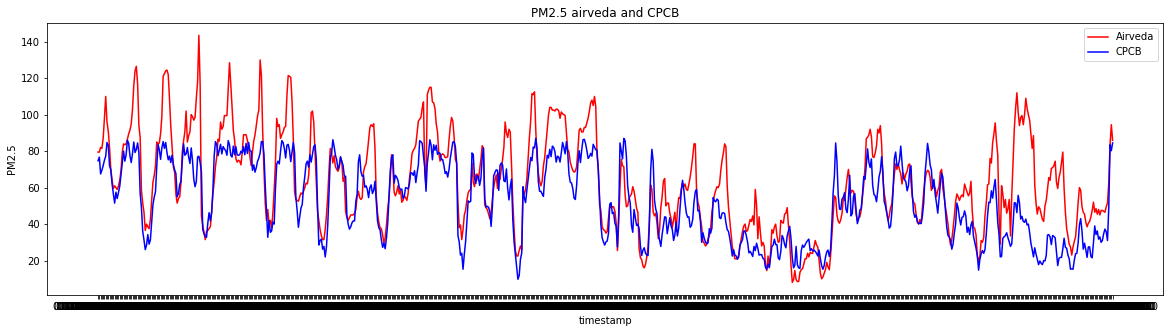

In [20]:
x = november['timestamp']
y1 = november['pm25_air']
y2 = november['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

In [3]:
# calculate summary statistics
nov_mean, nov_std = np.mean(november['pm25_air']), np.std(november['pm25_air'])

# identify outliers
cut_off = nov_std * 3
lower, upper = nov_mean - cut_off, nov_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", nov_mean, nov_std)
#identifying outliers
outliers = [x for x in november['pm25_air'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in november['pm25_air']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
november1 = november[november['pm25_air'] < upper]

cut off:  76.77089441916408
lower and upper boundaries:  -14.08 139.46
mean and standard deviation:  62.688442211055275 25.59029813972136
Identified outliers: 1
Non-outlier observations: 795


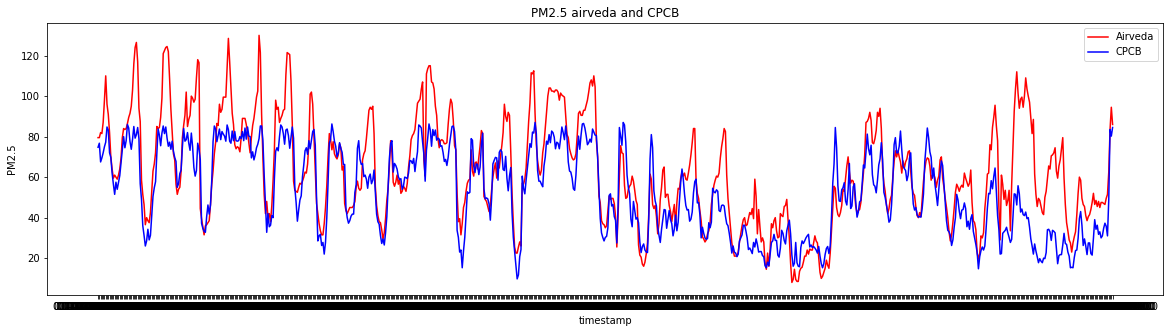

In [4]:
x = november1['timestamp']
y1 = november1['pm25_air']
y2 = november1['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

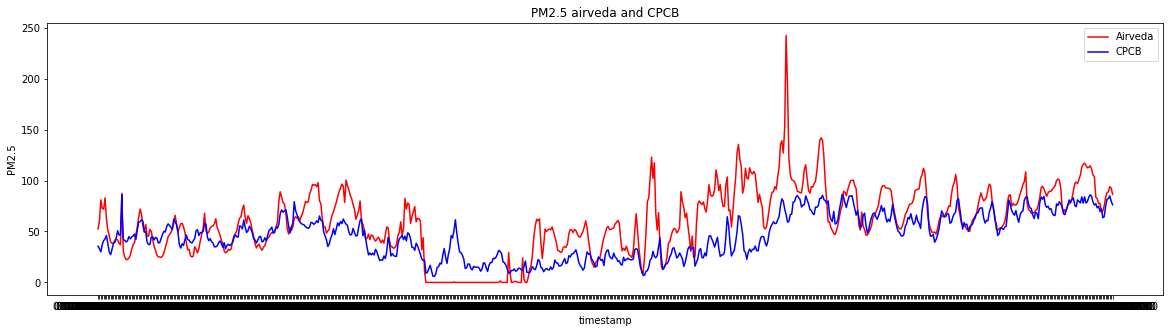

In [27]:
x = october['created_at']
y11 = october['pm25_air']
y21 = october['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y21, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

In [96]:
# calculate summary statistics
oct_mean, oct_std = np.mean(october['pm25_air']), np.std(october['pm25_air'])

# identify outliers
cut_off = oct_std * 3
lower, upper = oct_mean - cut_off, oct_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", oct_mean, oct_std)
#identifying outliers
outliers = [x for x in october['pm25_air'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in october['pm25_air']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
october1 = october[october['pm25_air'] < upper]

cut off:  97.2493730609819
lower and upper boundaries:  -37.66 156.83
mean and standard deviation:  59.58539944903581 32.416457686993965
Identified outliers: 2
Non-outlier observations: 724


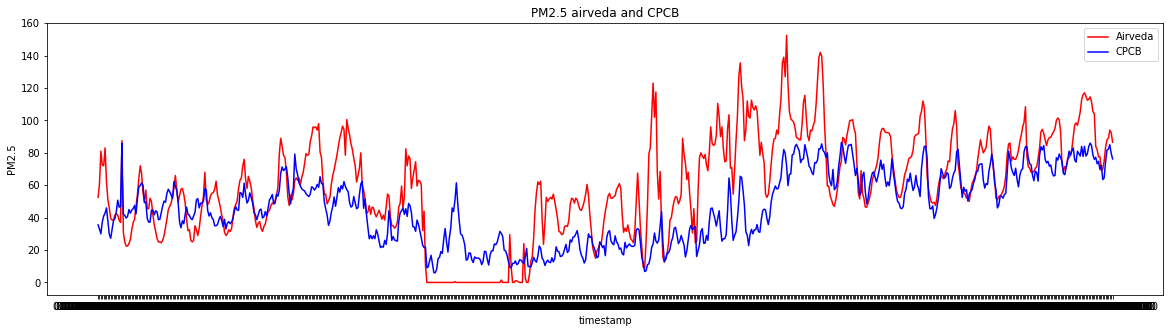

In [6]:
x = october1['created_at']
y11 = october1['pm25_air']
y21 = october1['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y21, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

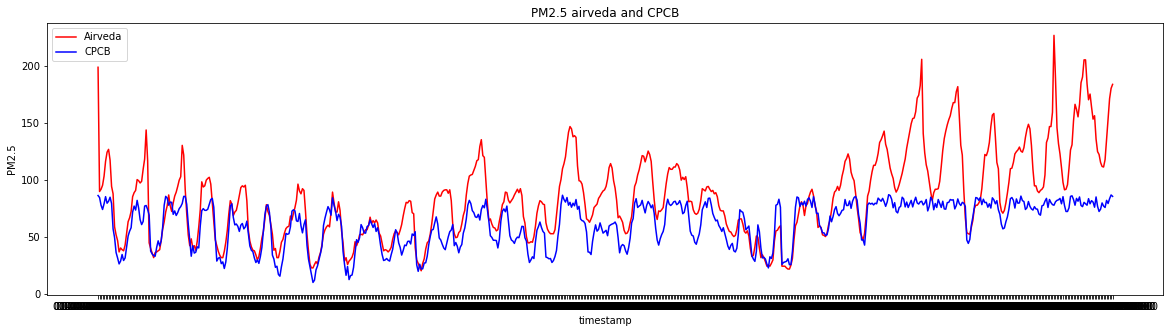

In [22]:
x = december['created_at']
y12 = december['pm25_air']
y22 = december['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y12, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

In [7]:
# calculate summary statistics
dec_mean, dec_std = np.mean(december['pm25_air']), np.std(december['pm25_air'])

# identify outliers
cut_off = dec_std * 3
lower, upper = dec_mean - cut_off, dec_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", dec_mean, dec_std)
#identifying outliers
outliers = [x for x in december['pm25_air'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in december['pm25_air']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
december1 = december[december['pm25_air'] < upper]

cut off:  111.70057187876961
lower and upper boundaries:  -27.68 195.72
mean and standard deviation:  84.02218934911242 37.23352395958987
Identified outliers: 5
Non-outlier observations: 671


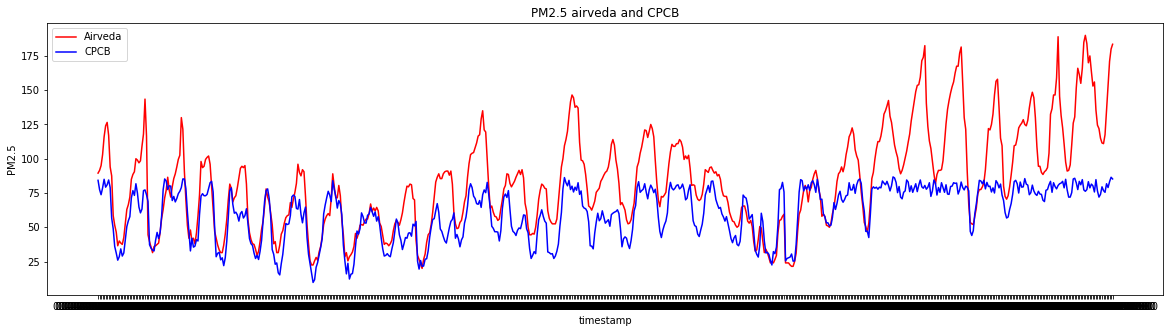

In [8]:
x = december1['created_at']
y12 = december1['pm25_air']
y22 = december1['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y12, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()

max correlation is at lag 0
max correlation is  0.801
Pearsons correlation: 0.802
MSE:  329.3524371069182
MAE:  13.2625786163522
RMSE  18.148069790115922


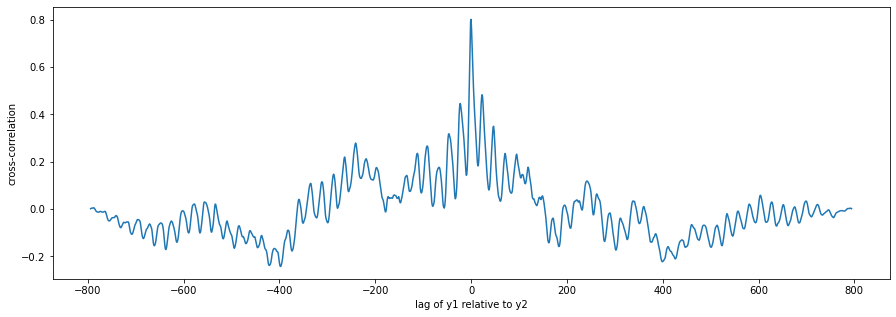

In [32]:
npts = len(november1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(november1['pm25_air'], november1['PM2.5'])
MAE = mean_absolute_error(november1['pm25_air'], november1['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(november1['pm25_air'], november1['PM2.5'])))

max correlation is at lag -1
max correlation is  0.703
Pearsons correlation: 0.700
MSE:  667.6826657458563
MAE:  19.54488950276243
RMSE  25.839556221921775


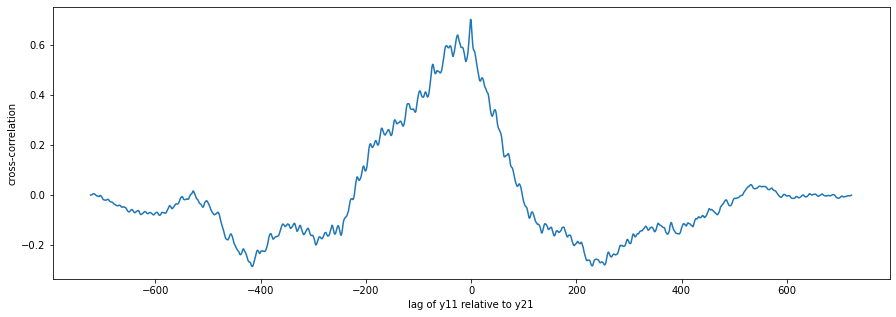

In [33]:
npts1 = len(october1)
lags1 = np.arange(-npts1 + 1, npts1)
ccov1 = np.correlate(y11 - y11.mean(), y21 - y21.mean(), mode='full')
ccor1 = ccov1 / (npts1 * y11.std() * y21.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags1, ccor1)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y21')

maxlag1 = lags1[np.argmax(ccor1)]
print("max correlation is at lag %d" % maxlag1)
print("max correlation is ", round(max(ccor1),3))
corr1, _ = pearsonr(y11, y21) 
print('Pearsons correlation: %.3f' % corr1) 
MSE1 = mean_squared_error(october1['pm25_air'], october1['PM2.5'])
MAE1 = mean_absolute_error(october1['pm25_air'], october1['PM2.5'])
print("MSE: ", MSE1)
print("MAE: ", MAE1)
print("RMSE ", np.sqrt(mean_squared_error(october1['pm25_air'], october1['PM2.5'])))

max correlation is at lag 0
max correlation is  0.784
Pearsons correlation: 0.786
MSE:  1060.4839791356185
MAE:  24.09165424739195
RMSE  32.56507299447705


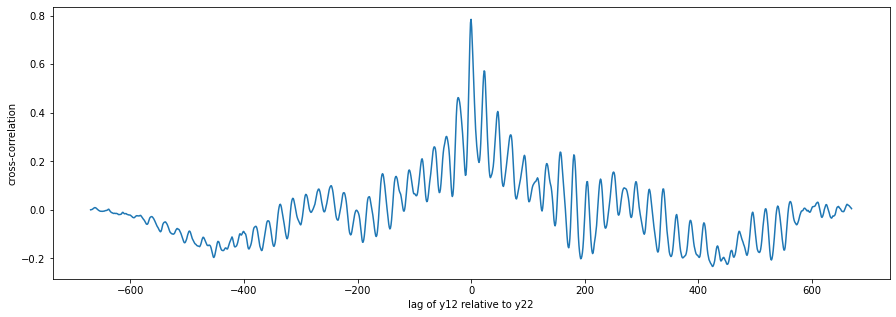

In [34]:
npts2 = len(december1)
lags2 = np.arange(-npts2 + 1, npts2)
ccov2 = np.correlate(y12 - y12.mean(), y22 - y22.mean(), mode='full')
ccor2 = ccov2 / (npts2 * y12.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags2, ccor2)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y12 relative to y22')

maxlag2 = lags2[np.argmax(ccor2)]
print("max correlation is at lag %d" % maxlag2)
print("max correlation is ", round(max(ccor2),3))
corr2, _ = pearsonr(y12, y22) 
print('Pearsons correlation: %.3f' % corr2) 
MSE2 = mean_squared_error(december1['pm25_air'], december1['PM2.5'])
MAE2 = mean_absolute_error(december1['pm25_air'], december1['PM2.5'])
print("MSE: ", MSE2)
print("MAE: ", MAE2)
print("RMSE ", np.sqrt(mean_squared_error(december1['pm25_air'], december1['PM2.5'])))

# November Month

Coefficients:  [[0.66217747]]
Intercept:  [11.09537031]
R2  0.6068484170544903
MAE of simple linear regression 10.146628180177968
MSE of simple linear regression 178.42076799849477
RMSE of simple linear regression 13.35742370363742
Test data Spearman correlation of simple linear regression: 0.799
Train data Spearman correlation of simple linear regression: 0.824
Mean Absolute Error Random Forest: 11.149837304629417
Mean Squared Error Random Forest: 211.48999431881055
Root Mean Squared Error Random Forest: 14.542695565774956
Test data R-2 score Random Forest: 0.534
Test data Spearman correlation Random Forest: 0.738


<ipython-input-64-9eff5d55ce75>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


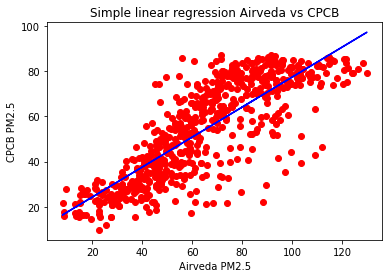

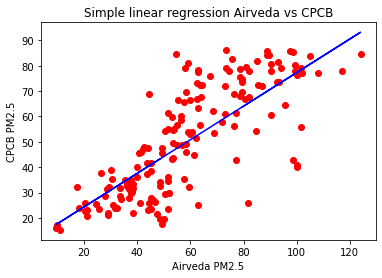

In [64]:
msk = (np.random.rand(len(november1)) < 0.8)
train = november1[msk]
test = november1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['pm25_air']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

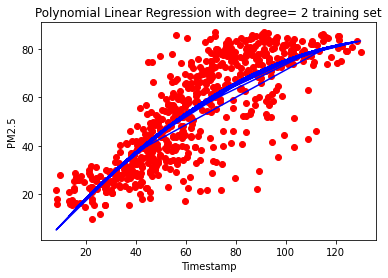

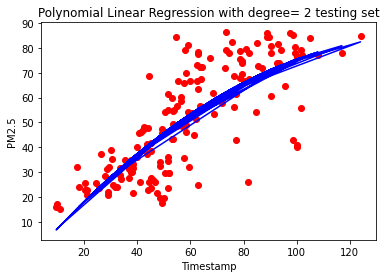

Mean Absolute Error polynomial linear regression: 9.90174217419826
Mean Squared Error polynomial linear regression: 169.42706211667615
Root Mean Squared Error polynomial linear regression: 13.016415102349654
Test data R-2 score polynomial linear regression: 0.627
Test data Spearman correlation polynomial linear regression: 0.799


In [65]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=2)
X_poly2 = poly_reg2.fit_transform(train_x)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, train_y)


plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg2.predict(poly_reg2.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 2 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg2.predict(poly_reg2.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 2 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y2 = pol_reg2.predict(poly_reg2.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y2))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y2))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y2)))
test_score = r2_score(test_y, pred_y2)
spearman = spearmanr(test_y, pred_y2)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

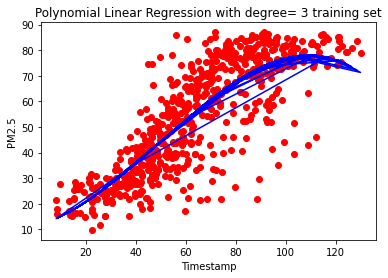

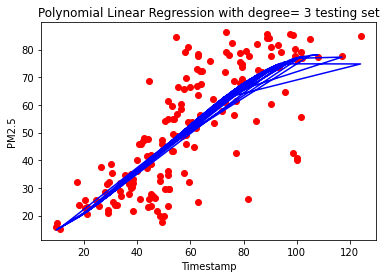

Mean Absolute Error polynomial linear regression: 9.437455638285938
Mean Squared Error polynomial linear regression: 164.16851759499178
Root Mean Squared Error polynomial linear regression: 12.812826292235128
Test data R-2 score polynomial linear regression: 0.638
Test data Spearman correlation polynomial linear regression: 0.797


In [66]:
poly_reg3 = PolynomialFeatures(degree=3)
X_poly3 = poly_reg3.fit_transform(train_x)
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly3, train_y)

plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg3.predict(poly_reg3.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 3 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg3.predict(poly_reg3.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 3 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


pred_y3 = pol_reg3.predict(poly_reg3.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y3))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y3))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y3)))
test_score = r2_score(test_y, pred_y3)
spearman = spearmanr(test_y, pred_y3)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

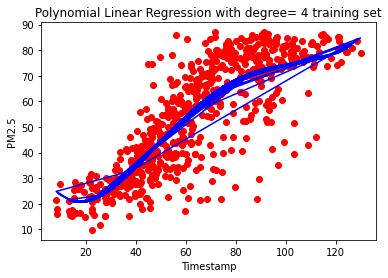

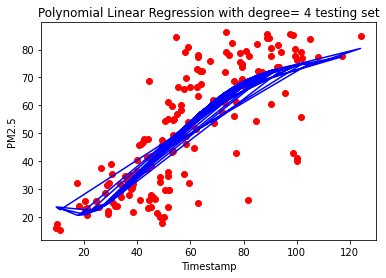

Mean Absolute Error polynomial linear regression: 9.44193024446928
Mean Squared Error polynomial linear regression: 158.23066306114472
Root Mean Squared Error polynomial linear regression: 12.578977027610183
Test data R-2 score polynomial linear regression: 0.651
Test data Spearman correlation polynomial linear regression: 0.797


In [67]:
poly_reg4 = PolynomialFeatures(degree=4)
X_poly4 = poly_reg4.fit_transform(train_x)
pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly4, train_y)

plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg4.predict(poly_reg4.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 4 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg4.predict(poly_reg4.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 4 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y4 = pol_reg4.predict(poly_reg4.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y4))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y4))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y4)))
test_score = r2_score(test_y, pred_y4)
spearman = spearmanr(test_y, pred_y4)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

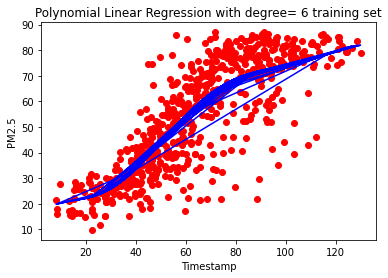

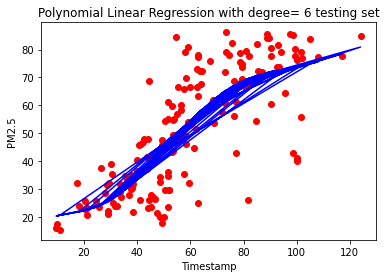

Mean Absolute Error polynomial linear regression: 9.330457919078246
Mean Squared Error polynomial linear regression: 155.38289513469394
Root Mean Squared Error polynomial linear regression: 12.465267551669076
Test data R-2 score polynomial linear regression: 0.658
Test data Spearman correlation polynomial linear regression: 0.799


In [68]:
poly_reg6 = PolynomialFeatures(degree=6)
X_poly6 = poly_reg6.fit_transform(train_x)
pol_reg6 = LinearRegression()
pol_reg6.fit(X_poly6, train_y)

plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg6.predict(poly_reg6.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 6 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg6.predict(poly_reg6.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 6 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y6 = pol_reg6.predict(poly_reg6.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y6))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y6))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y6)))
test_score = r2_score(test_y, pred_y6)
spearman = spearmanr(test_y, pred_y6)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

In [69]:
train_x = np.asanyarray(train[['pm25_air', 'PM10']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air', 'PM10']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.25219655 0.34662395]]
Intercept:  [-1.4424631]
R2  0.9285811344117645
MAE  4.654958024966767
MSE  32.411439761646264
RMSE  5.693104580248484
variance score = 0.9286856877292143
Test data Spearman correlation: 0.957
Mean Absolute Error Random Forest: 4.62
Mean Squared Error Random Forest: 32.90681628787878
Root Mean Squared Error Random Forest: 5.736446311775155
Test data R-2 score Random Forest: 0.927
Test data Spearman correlation Random Forest: 0.944


<ipython-input-69-020244ca2b6a>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


In [71]:
train_x = np.asanyarray(train[['pm25_air', 'pm10_air']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air', 'pm10_air']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.38410916 0.2145405 ]]
Intercept:  [6.59017566]
R2  0.6194391906013232
MAE  10.085338712164369
MSE  172.70680019734664
RMSE  13.141795927396934
variance score = 0.6205436435201184
Test data Spearman correlation: 0.817
Mean Absolute Error Random Forest: 9.320964646464645
Mean Squared Error Random Forest: 161.2289235311448
Root Mean Squared Error Random Forest: 12.697595186929878
Test data R-2 score Random Forest: 0.645
Test data Spearman correlation Random Forest: 0.799


<ipython-input-71-3f6b8200126d>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


## October Month

In [103]:
october1 = october1.dropna()

Coefficients:  [[0.51859501]]
Intercept:  [17.18257892]
R2  0.44362007225145395
MAE of simple linear regression 11.3670521677376
MSE of simple linear regression 220.59796611630443
RMSE of simple linear regression 14.852540729326563
Test data Spearman correlation of simple linear regression: 0.686
Train data Spearman correlation of simple linear regression: 0.751
Mean Absolute Error Random Forest: 11.319887008731552
Mean Squared Error Random Forest: 212.76060233592963
Root Mean Squared Error Random Forest: 14.586315584681747
Test data R-2 score Random Forest: 0.463
Test data Spearman correlation Random Forest: 0.688


<ipython-input-104-b9d859c8d48c>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


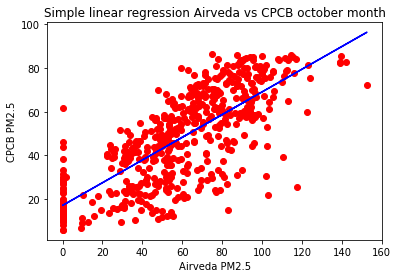

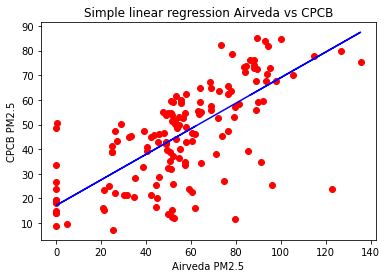

In [104]:
msk = (np.random.rand(len(october1)) < 0.8)
train = october1[msk]
test = october1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['pm25_air']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB october month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

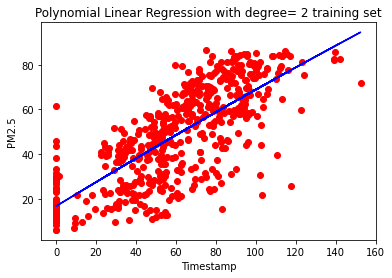

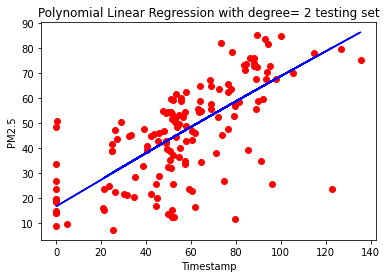

Mean Absolute Error polynomial linear regression: 11.362534047090419
Mean Squared Error polynomial linear regression: 220.83795667697518
Root Mean Squared Error polynomial linear regression: 14.860617641167382
Test data R-2 score polynomial linear regression: 0.443
Test data Spearman correlation polynomial linear regression: 0.686


In [105]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=2)
X_poly2 = poly_reg2.fit_transform(train_x)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, train_y)


plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg2.predict(poly_reg2.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 2 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg2.predict(poly_reg2.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 2 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y2 = pol_reg2.predict(poly_reg2.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y2))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y2))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y2)))
test_score = r2_score(test_y, pred_y2)
spearman = spearmanr(test_y, pred_y2)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

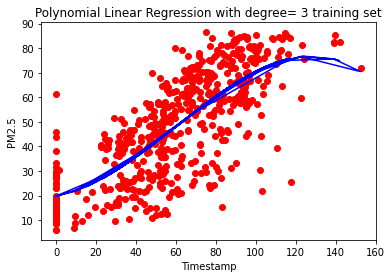

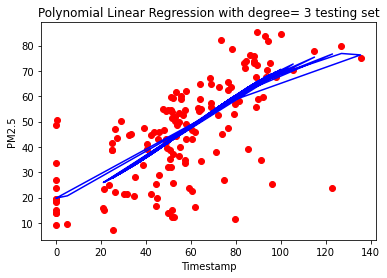

Mean Absolute Error polynomial linear regression: 11.130377729946249
Mean Squared Error polynomial linear regression: 212.27178576670056
Root Mean Squared Error polynomial linear regression: 14.569549950726019
Test data R-2 score polynomial linear regression: 0.465
Test data Spearman correlation polynomial linear regression: 0.686


In [106]:
poly_reg3 = PolynomialFeatures(degree=3)
X_poly3 = poly_reg3.fit_transform(train_x)
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly3, train_y)

plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg3.predict(poly_reg3.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 3 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg3.predict(poly_reg3.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 3 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


pred_y3 = pol_reg3.predict(poly_reg3.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y3))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y3))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y3)))
test_score = r2_score(test_y, pred_y3)
spearman = spearmanr(test_y, pred_y3)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

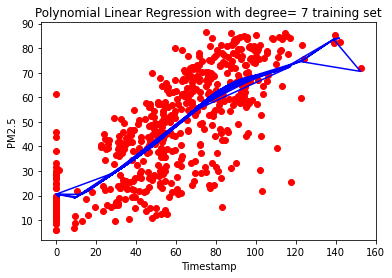

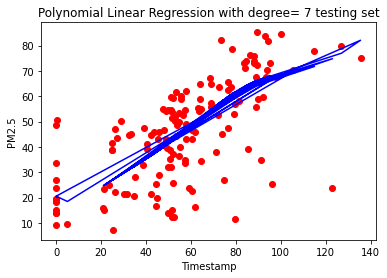

Mean Absolute Error polynomial linear regression: 11.139713920862096
Mean Squared Error polynomial linear regression: 211.6136332070219
Root Mean Squared Error polynomial linear regression: 14.546945837770274
Test data R-2 score polynomial linear regression: 0.466
Test data Spearman correlation polynomial linear regression: 0.685


In [107]:
poly_reg7 = PolynomialFeatures(degree=7)
X_poly7 = poly_reg7.fit_transform(train_x)
pol_reg7 = LinearRegression()
pol_reg7.fit(X_poly7, train_y)

plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg7.predict(poly_reg7.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()


plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg7.predict(poly_reg7.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y7 = pol_reg7.predict(poly_reg7.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y7))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y7))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y7)))
test_score = r2_score(test_y, pred_y7)
spearman = spearmanr(test_y, pred_y7)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

In [108]:
train_x = np.asanyarray(train[['pm25_air', 'PM10']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air', 'PM10']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.15239189 0.39027872]]
Intercept:  [2.73754671]
R2  0.9265628019911879
MAE  4.2925453452787075
MSE  29.116967938760467
RMSE  5.3960140788141455
variance score = 0.9277054234905483
Test data Spearman correlation: 0.966
Mean Absolute Error Random Forest: 3.8438448275862074
Mean Squared Error Random Forest: 22.92507343390805
Root Mean Squared Error Random Forest: 4.788013516470902
Test data R-2 score Random Forest: 0.942
Test data Spearman correlation Random Forest: 0.969


<ipython-input-108-020244ca2b6a>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


In [109]:
train_x = np.asanyarray(train[['pm25_air', 'pm10_air']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['pm25_air', 'pm10_air']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.90516243 -0.27032525]]
Intercept:  [19.96587437]
R2  0.5200678286303899
MAE  11.020955810178375
MSE  190.28734790333084
RMSE  13.79446801813433
variance score = 0.5201530735576165
Test data Spearman correlation: 0.717
Mean Absolute Error Random Forest: 9.733381654105793
Mean Squared Error Random Forest: 197.9778032510856
Root Mean Squared Error Random Forest: 14.070458530235808
Test data R-2 score Random Forest: 0.501
Test data Spearman correlation Random Forest: 0.715


<ipython-input-109-3f6b8200126d>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


## Training october, november data and testing December data

In [111]:
octnov = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\oct-nov.csv")

In [112]:
octnov.head()

,created_at,pm25_air,pm10_air,PM2.5,PM10
0,01-10-2020 01:00,52.5,86.0,35.50,51.75
1,01-10-2020 02:00,60.5,94.5,33.00,50.25
2,01-10-2020 03:00,81.0,122.0,30.00,48.00
3,01-10-2020 04:00,72.5,109.5,37.25,62.75
4,01-10-2020 05:00,72.0,108.5,41.00,56.25


In [113]:
# calculate summary statistics
octnov_mean, octnov_std = np.mean(octnov['pm25_air']), np.std(octnov['pm25_air'])

# identify outliers
cut_off = octnov_std * 3
lower, upper = octnov_mean - cut_off, octnov_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", octnov_mean, octnov_std)
#identifying outliers
outliers = [x for x in octnov['pm25_air'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in octnov['pm25_air']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
octnov1 = octnov[octnov['pm25_air'] < upper]

cut off:  85.65205914122564
lower and upper boundaries:  -24.3 147.01
mean and standard deviation:  61.35548738922972 28.550686380408546
Identified outliers: 3
Non-outlier observations: 1464


Coefficients:  [0.56079125]
Intercept:  16.063579057236808
R2  0.4875494808380094
MAE of simple linear regression 10.409607980010353
MSE of simple linear regression 187.73769158894777
RMSE of simple linear regression 13.701740458385123
Test data Spearman correlation of simple linear regression: 0.82
Train data Spearman correlation of simple linear regression: 0.78
Mean Absolute Error Random Forest: 8.884093919897008
Mean Squared Error Random Forest: 130.78998617674677
Root Mean Squared Error Random Forest: 11.436344965798591
Test data R-2 score Random Forest: 0.643
Test data Spearman correlation Random Forest: 0.744


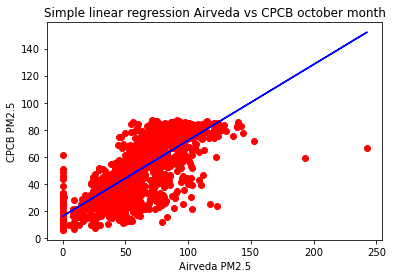

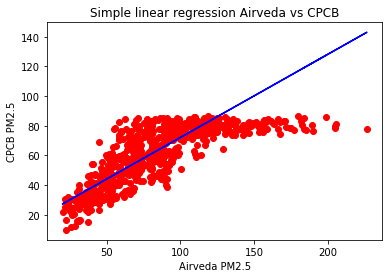

In [132]:


regr = linear_model.LinearRegression()

train_x = np.asanyarray(octnov['pm25_air'])
train_y = np.asanyarray(octnov['PM2.5'])
regr.fit (train_x.reshape(-1,1), train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(december['pm25_air'])
test_y = np.asanyarray(december['PM2.5'])

# predicting values
test_y_hat = regr.predict(test_x.reshape(-1,1))

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x.reshape(-1,1), train_y) 
y_pred = regressor.predict(test_x.reshape(-1,1))


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x.reshape(-1,1))
predicted_test = regressor.predict(test_x.reshape(-1,1))
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x.reshape(-1,1)), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB october month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x.reshape(-1,1)), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

In [133]:
train_x = np.asanyarray(octnov[['pm25_air', 'PM10']])
train_y = np.asanyarray(octnov['PM2.5'])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(december[['pm25_air', 'PM10']])
test_y = np.asanyarray(december['PM2.5'])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [0.1844238  0.37178004]
Intercept:  1.109347098046861
R2  0.8451219011616664
MAE  5.941953866558369
MSE  56.740027897995525
RMSE  7.532597685924526
variance score = 0.8606466195223932
Test data Spearman correlation: 0.932
Mean Absolute Error Random Forest: 4.135653969428009
Mean Squared Error Random Forest: 29.262148754674143
Root Mean Squared Error Random Forest: 5.409449949363997
Test data R-2 score Random Forest:  0.92
Test data Spearman correlation Random Forest: 0.933


In [134]:
train_x = np.asanyarray(octnov[['pm25_air', 'pm10_air']])
train_y = np.asanyarray(octnov['PM2.5'])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(december[['pm25_air', 'pm10_air']])
test_y = np.asanyarray(december['PM2.5'])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [ 0.70987409 -0.09117272]
Intercept:  16.106360326644015
R2  0.5273821238644301
MAE  10.051849337786466
MSE  173.14489058272437
RMSE  13.158453198713152
variance score = 0.5387467689444272
Test data Spearman correlation: 0.811
Mean Absolute Error Random Forest: 9.32588898281206
Mean Squared Error Random Forest: 178.22192422046913
Root Mean Squared Error Random Forest: 13.349978435206145
Test data R-2 score Random Forest: 0.514
Test data Spearman correlation Random Forest: 0.655


## Airveda and CPCB 15 min data (original data)

In [2]:
air15 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\Airveda&cpcb_15min.csv")

In [3]:
air15.head()

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,01-11-2020 00:00,82.0,127.0,73,172
1,1,01-11-2020 00:15,83.0,125.0,73,172
2,2,01-11-2020 00:30,76.0,117.0,73,172
3,3,01-11-2020 01:00,81.0,120.5,80,158
4,4,01-11-2020 01:15,83.0,118.0,80,158


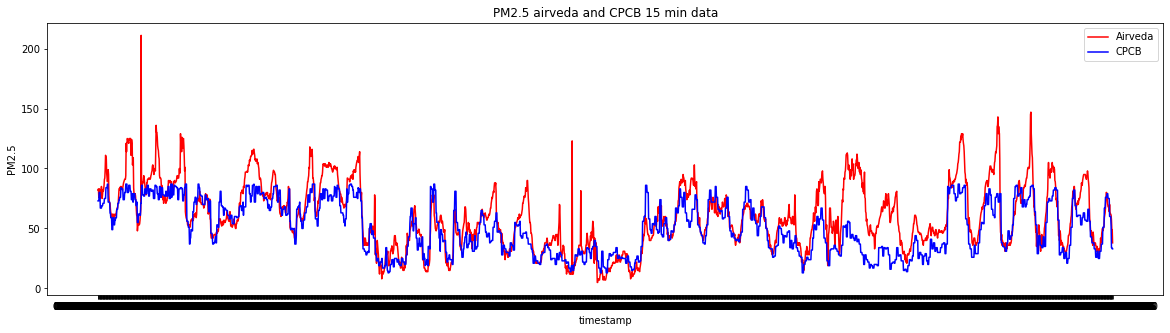

In [4]:
x = air15['created_at']
y11 = air15['air_pm25']
y21 = air15['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y21, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB 15 min data')
plt.show()

In [5]:
# calculate summary statistics
air_mean, air_std = np.mean(air15['air_pm25']), np.std(air15['air_pm25'])

# identify outliers
cut_off = air_std * 3
lower, upper = air_mean - cut_off, air_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", air_mean, air_std)
#identifying outliers
outliers = [x for x in air15['air_pm25'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in air15['air_pm25']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
air15_1 = air15[air15['air_pm25'] < upper]

cut off:  80.06119158301647
lower and upper boundaries:  -19.75 140.37
mean and standard deviation:  60.30871491875923 26.68706386100549
Identified outliers: 4
Non-outlier observations: 2704


Coefficients:  [[0.6526196]]
Intercept:  [11.13358849]
R2  0.6522761840516917
MAE of simple linear regression 9.722882092313226
MSE of simple linear regression 161.290608483073
RMSE of simple linear regression 12.700023956003902
Test data Spearman correlation of simple linear regression: 0.827
Train data Spearman correlation of simple linear regression: 0.812
Mean Absolute Error Random Forest: 9.232302827171063
Mean Squared Error Random Forest: 149.4897380916831
Root Mean Squared Error Random Forest: 12.226599612798445
Test data R-2 score Random Forest: 0.678
Test data Spearman correlation Random Forest: 0.815


<ipython-input-6-b3245ca2a891>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


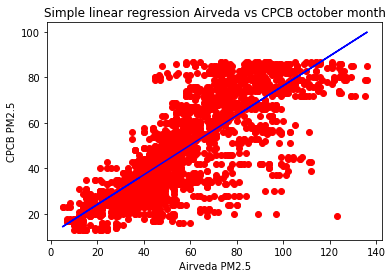

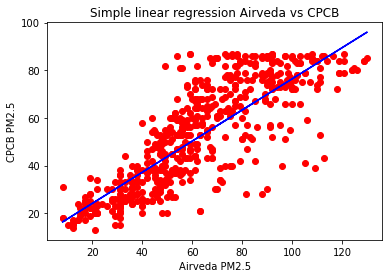

In [6]:
msk = (np.random.rand(len(air15_1)) < 0.8)
train = air15_1[msk]
test = air15_1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['air_pm25']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB october month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

In [7]:


train_x = np.asanyarray(train[['air_pm25', 'cpcb_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25', 'cpcb_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])
# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.2404437  0.35406697]]
Intercept:  [-1.48077187]
R2  0.9135127404898775
MAE  5.030202550063313
MSE  40.11684582023225
RMSE  6.333786057346131
variance score = 0.9139113203653014
Test data Spearman correlation: 0.957
Mean Absolute Error Random Forest: 3.7194012076484406
Mean Squared Error Random Forest: 25.953703118084793
Root Mean Squared Error Random Forest: 5.094477708076147
Test data R-2 score Random Forest: 0.944
Test data Spearman correlation Random Forest: 0.967


<ipython-input-7-8a549e55b8ec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


In [8]:
train_x = np.asanyarray(train[['air_pm25', 'air_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25', 'air_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])
# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.62310733 0.02316583]]
Intercept:  [10.60064237]
R2  0.6543501802825057
MAE  9.69634933239685
MSE  160.32859179420373
RMSE  12.66209270990399
variance score = 0.6575765399133362
Test data Spearman correlation: 0.83
Mean Absolute Error Random Forest: 8.950351184793066
Mean Squared Error Random Forest: 150.4522508244374
Root Mean Squared Error Random Forest: 12.265897880890638
Test data R-2 score Random Forest: 0.676
Test data Spearman correlation Random Forest: 0.824


<ipython-input-8-f78bf120d60f>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


## Airveda and CPCB 1hr data (Downsampled data)

In [9]:
air1 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\Airveda&cpcb_1h.csv")

In [10]:
air1.head()

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73.0,172.0
1,1,2020-11-01 01:00:00,81.0,120.5,80.0,158.0
2,2,2020-11-01 02:00:00,81.0,116.0,67.0,132.0
3,3,2020-11-01 03:00:00,83.0,126.0,69.0,133.0
4,4,2020-11-01 04:00:00,81.0,121.0,71.0,152.0


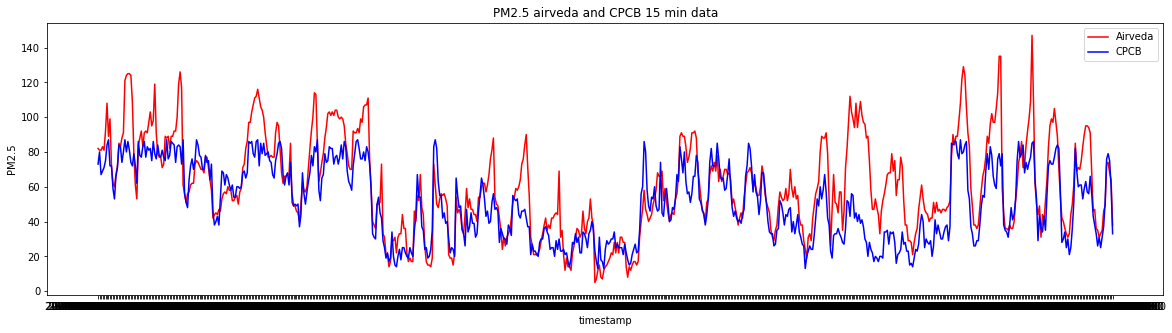

In [11]:
x = air1['created_at']
y11 = air1['air_pm25']
y21 = air1['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y21, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB 15 min data')
plt.show()

In [12]:
# calculate summary statistics
air1_mean, air1_std = np.mean(air1['air_pm25']), np.std(air1['air_pm25'])

# identify outliers
cut_off = air1_std * 3
lower, upper = air1_mean - cut_off, air1_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", air1_mean, air1_std)
#identifying outliers
outliers = [x for x in air1['air_pm25'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in air1['air_pm25']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
air1_1 = air1[air1['air_pm25'] < upper]

cut off:  80.47190505362413
lower and upper boundaries:  -19.79 141.15
mean and standard deviation:  60.6798825256975 26.82396835120804
Identified outliers: 1
Non-outlier observations: 680


Coefficients:  [[0.67981768]]
Intercept:  [9.7272274]
R2  0.5388813614684519
MAE of simple linear regression 10.584470432041083
MSE of simple linear regression 201.44946394449724
RMSE of simple linear regression 14.193289398321209
Test data Spearman correlation of simple linear regression: 0.794
Train data Spearman correlation of simple linear regression: 0.835
Mean Absolute Error Random Forest: 10.206961845864424
Mean Squared Error Random Forest: 198.1611033981995
Root Mean Squared Error Random Forest: 14.076970675475582
Test data R-2 score Random Forest: 0.546
Test data Spearman correlation Random Forest: 0.772


<ipython-input-13-4f66f4cb0851>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


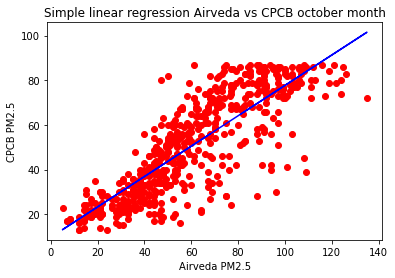

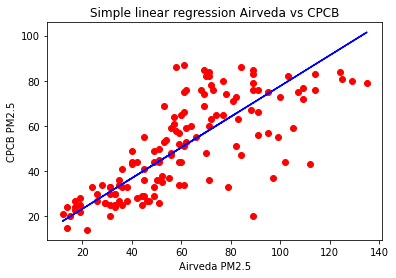

In [13]:
msk = (np.random.rand(len(air1_1)) < 0.8)
train = air1_1[msk]
test = air1_1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['air_pm25']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB october month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('Airveda PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression Airveda vs CPCB")
plt.show()

In [14]:
train_x = np.asanyarray(train[['air_pm25', 'cpcb_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25', 'cpcb_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])
# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.254974   0.34444096]]
Intercept:  [-1.17006531]
R2  0.9085774514454832
MAE  4.943459027781663
MSE  39.939880672351414
RMSE  6.31980068296077
variance score = 0.9089616046271045
Test data Spearman correlation: 0.95
Mean Absolute Error Random Forest: 4.813102189781022
Mean Squared Error Random Forest: 37.718385827250614
Root Mean Squared Error Random Forest: 6.141529599965355
Test data R-2 score Random Forest: 0.914
Test data Spearman correlation Random Forest: 0.945


<ipython-input-14-8a549e55b8ec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


In [15]:
train_x = np.asanyarray(train[['air_pm25', 'air_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['air_pm25', 'air_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.43072642 0.19246272]]
Intercept:  [5.73910589]
R2  0.5475679765533352
MAE  10.4456718068074
MSE  197.65453178145435
RMSE  14.058966241564645
variance score = 0.5489967131708167
Test data Spearman correlation: 0.81
Mean Absolute Error Random Forest: 9.016604970455335
Mean Squared Error Random Forest: 154.6004625189309
Root Mean Squared Error Random Forest: 12.433843433103494
Test data R-2 score Random Forest: 0.646
Test data Spearman correlation Random Forest: 0.823


<ipython-input-15-329f567f3fa9>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)
